## Soil only (Richards equation)

The Richards equations is given by 

Following Jan benchmarking example (1-4) and compare numerical to analytical solutions

Link to another [Notebook 2](Untitled.ipynb)

### Benchmark 1 

### Benchmark 2 

### Benchmark 3

### Benchmark 4

### Discussion

There are many softwares solving Richards equation, that can be used to validate own developments. Important features are 
* supported dimensions: 1D, 1D axial symmetric, 3D
* mass conservative method 
* runs parallel 
* supports mesh refinement


## Analytical solution which produces Figure 2abc of Vanderborght et al. 2005

C:\Users\a.schnepf\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


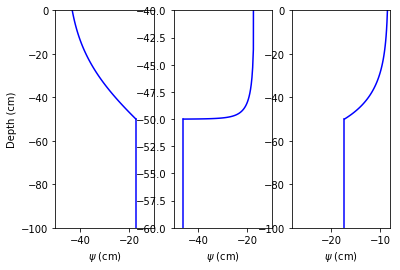

In [1]:
#
# produces the analytical solution Figure 2abc
# from Vanderborght et al 2005
#
# D. Leitner, 2018
#
import numpy as np
from scipy import optimize
from scipy import integrate
import van_genuchten as vg
import matplotlib.pyplot as plt
%matplotlib inline  

sand = vg.Parameters(0.045, 0.43, 0.15, 3, 1.1574e-04*100*3600*24)
loam = vg.Parameters(0.08, 0.43, 0.04, 1.6, 5.7870e-06*100*3600*24)
clay = vg.Parameters(0.1, 0.4, 0.01, 1.1, 1.1574e-06*100*3600*24)

Jw = 0.5;  # constant downward flow rate [cm/d]

#
# The lower part (constant pressure)
#
Ks = lambda psi: vg.hydraulic_conductivity(psi,sand)-Jw
Kl = lambda psi: vg.hydraulic_conductivity(psi,loam)-Jw
Kc = lambda psi: vg.hydraulic_conductivity(psi,clay)-Jw
psi_s = optimize.brentq(Ks, -100, 0);
psi_l = optimize.brentq(Kl, -100, 0);
psi_c = optimize.brentq(Kc, -100, 0);

 # 
# The upper part
#
Ks = lambda psi: vg.hydraulic_conductivity(psi,sand)
Kl = lambda psi: vg.hydraulic_conductivity(psi,loam)
Kc = lambda psi: vg.hydraulic_conductivity(psi,clay)
# integrand Eqn [14]
Fs = lambda psi: 1./(Jw/Ks(psi) - 1.) 
Fl = lambda psi: 1./(Jw/Kl(psi) - 1.)
Fc = lambda psi: 1./(Jw/Kc(psi) - 1.)
    
N = 100 # resolution
dz = np.ones(N,)
    
psiA = np.linspace(-45,psi_s,N) # Loam (on sand)
for i in range(0,N):
    ans, err = integrate.quad(Fl,psi_s, psiA[i])
    dz[i] = ans
zA = dz - 50. 
     
psiB = np.linspace(psi_l,psi_s-1e-10,N) # Sand (on loam)
for  i in range(0,N):
    ans, err = integrate.quad(Fs,psi_l,psiB[i]);
    dz[i] = ans
zB = dz + -50;
    
     
psiC = np.linspace(psi_s,psi_c-1e-3,100); # Clay (on sand)
for  i in range(0,N):    
    ans, err = integrate.quad(Fc,psi_s,psiC[i]);
    dz[i] = ans    
zC = dz + (-50);
    
    
#
# prepare plot
#
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    
z_ = np.linspace(-50,-100,2)
ax1.plot([psi_s,psi_s],z_,'b') # sand
ax1.plot(psiA,zA,'b');
ax1.set_xlabel('$\psi$ (cm)')
ax1.set_ylabel('Depth (cm)')
ax1. set_xlim(-50,-10)
ax1.set_ylim(-100,0)
    
z_ = np.linspace(-50,-100,2)
ax2.plot([psi_l,psi_l],z_,'b')
ax2.plot(psiB,zB,'b');
ax2.set_xlabel('$\psi$ (cm)') # loam
ax2.set_xlim(-50,-10)
ax2.set_ylim(-60,-40)
    
z_ = np.linspace(-50,-100,2)
ax3.plot([psi_s,psi_s],z_,'b') # sand
ax3.plot(psiC,zC,'b');
ax3.set_xlabel('$\psi$ (cm)')
ax3.set_xlim(-28,-8)
ax3.set_ylim(-100,0)

plt.show()

## Analytical solution which produces Figures 4abc from Vanderborght et al. (2005)

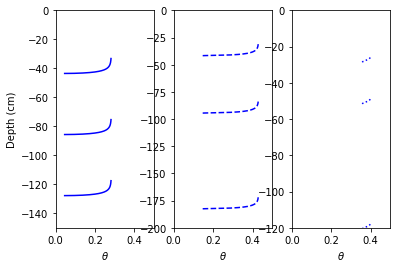

In [2]:
#
# produces the analytical solution Figure 4abc
# from Vanderborght et al 2005
#
# D. Leitner, 2018
#
import numpy as np
from scipy import optimize
from scipy import integrate
import van_genuchten as vg
import matplotlib.pyplot as plt
%matplotlib inline  

sand = vg.Parameters(0.045, 0.43, 0.15, 3, 1.1574e-04*100*3600*24)
loam = vg.Parameters(0.08, 0.43, 0.04, 1.6, 5.7870e-06*100*3600*24)
clay = vg.Parameters(0.1, 0.4, 0.01, 1.1, 1.1574e-06*100*3600*24)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax = [ax1,ax2,ax3]

for i, soil in enumerate([sand, loam, clay]): # make three subplots
        
    if soil==sand:
        theta_sur = 0.2824
    else:
        theta_sur = soil.theta_S
        
    theta_i = vg.water_content(-400,soil);
        
    K_sur = vg.hydraulic_conductivity( vg.pressure_head(theta_sur,soil), soil);
    K_i = vg.hydraulic_conductivity(-400, soil)
    psi = lambda theta: vg.pressure_head(theta,soil)
    K = lambda psi: vg.hydraulic_conductivity(psi,soil)
    Dw = lambda psi: K(psi)/(vg.specific_moisture_storage(psi,soil))
            
    F = lambda theta:  Dw(psi(theta)) / ( (K_sur - K_i)*(theta - theta_i) - (K(psi(theta)) - K_i)*(theta_sur - theta_i) ) 
    
    theta_a = (theta_sur+theta_i)/2
    
    if soil==clay: # todo: same same?
        theta_ = np.linspace (theta_i+1e-3,theta_sur-1e-3,300)
    else:
        theta_ = np.linspace (theta_i+1e-3,theta_sur-1e-3,300)

    delta_eta = np.zeros(len(theta_),)
    for j in range(0,len(theta_)):
        ans, err = integrate.quad(F,theta_[j],theta_a)
        delta_eta[j] = ans
    
    delta_eta = delta_eta * (theta_sur - theta_i)
    
#     %figure(1)
#     % plot(theta_, delta_eta,'k-','linewidth',2)
#     % set(gca,'Ydir','reverse')
#     % xlabel('\theta');
#     % ylabel('\Delta\eta (cm)');
#     % axis([0,0.5,-10,5]);
    
    tv=[ [0.1, 0.2, 0.3],
         [0.2, 0.5, 1.0], 
         [0.1, 0.2, 0.5]]     

    x_aa = [43, 41, 27.5]  # [42.14103, 35.21381052, 23.0052]; %50;  #  how to choose reference water content and its position ????
    x_a = x_aa[i]
    
    t_a2 = [0.1, 0.2, 0.1] 
    t_a = t_a2[i]
        
    eta_a = x_a - (K_sur-K_i)/(theta_sur - theta_i)*t_a
    eta = delta_eta + eta_a

    # finally, plot the thing    
    lineStyle= ['b-','b--','b:'] 
    for j in range(0,len(tv[0])):
        t = tv[i][j]
        x = eta  + (K_sur - K_i) * t / (theta_sur - theta_i);
        ax[i].plot(theta_,-x,lineStyle[i])
    
    ax[i].set_xlabel(r'$\theta$')
    ax[i].set_xlim(0,0.5)

ax1.set_ylabel('Depth (cm)')
ax1.set_xlabel(r'$\theta$')
ax1.set_xlim(0,0.5)
ax1.set_ylim(-150,0)

ax2.set_xlabel(r'$\theta$')
ax2.set_xlim(0,0.5)
ax2.set_ylim(-200,0)

ax3.set_xlabel(r'$\theta$')
ax3.set_xlim(0,0.5)
ax3.set_ylim(-120,0)

plt.show()